In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas

# Function that creates the X matrix as defined for fitting our model
def create_X(x,deg):
    X = np.ones((len(x),deg+1))
    for i in range(1,deg+1):
        X[:,i] = x**i
    return X

# Function for predicting the response
def predict_y(x,beta):
    return np.dot(create_X(x,len(beta)-1),beta)

# Function for fitting the model
def fit_beta(df,deg):
    return np.linalg.lstsq(create_X(df.x,deg),df.y,rcond=None)[0]

# Function for computing the MSE
def mse(y,yPred):
    return np.mean((y-yPred)**2)

# Loading training, validation and test data
dfTrain = pandas.read_csv('Data_Train.csv')
dfVal = pandas.read_csv('Data_Val.csv')
dfTest = pandas.read_csv('Data_Test.csv')

############ TRAINING A MODEL

# Fitting model
deg = 1
X = create_X(dfTrain.x,deg)
beta = fit_beta(dfTrain,deg)

# Computing training error
yPredTrain = predict_y(dfTrain.x,beta)
err = mse(dfTrain.y,yPredTrain)
print('Training Error = {:2.3}'.format(err))

# Computing test error
yPredTest = predict_y(dfTest.x,beta)
err = mse(dfTest.y,yPredTest)
print('Test Error = {:2.3}'.format(err))

Training Error = 0.0258
Test Error = 0.0154


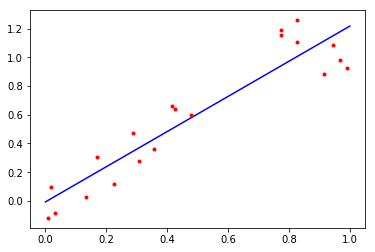

In [18]:
############ PLOTTING FITTED MODEL
x = np.linspace(0,1,100)
y = predict_y(x,beta)

plt.plot(x,y,'b-',dfTrain.x,dfTrain.y,'r.')
plt.show()

0
Training Error = 0.199
Validation Error = 0.247
1
Training Error = 0.0258
Validation Error = 0.0249
2
Training Error = 0.0188
Validation Error = 0.0186
3
Training Error = 0.00967
Validation Error = 0.00843
4
Training Error = 0.00929
Validation Error = 0.00934
5
Training Error = 0.00902
Validation Error = 0.0109
6
Training Error = 0.00874
Validation Error = 0.0108
7
Training Error = 0.00873
Validation Error = 0.0109
8
Training Error = 0.00873
Validation Error = 0.0111
9
Training Error = 0.00823
Validation Error = 0.0152
10
Training Error = 0.00673
Validation Error = 0.0392


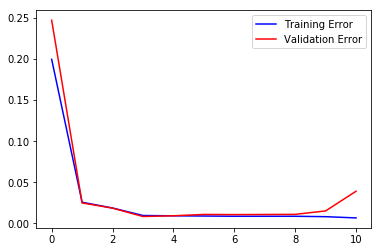

In [32]:
############ HYPER-PARAMETER TUNING

# Initializing range of degree values to be tested and errors
#degRange = list(range(1,11))
degRange = range(0,11)
errTrain = np.zeros(len(degRange))
errVal = np.zeros(len(degRange))

# Computing error as a function of degree
# ...
for i in degRange:
    print(i)
    X = create_X(dfTrain.x,i)
    beta = fit_beta(dfTrain,i)
    yPredTra = predict_y(dfTrain.x,beta)
    errTrain[i] = mse(dfTrain.y,yPredTra)
    print('Training Error = {:2.3}'.format(errTrain[i]))
    yPredVal = predict_y(dfVal.x,beta)
    errVal[i] = mse(dfVal.y,yPredVal)
    print('Validation Error = {:2.3}'.format(errVal[i]))

# Plotting training and validation errors
#plt.plot(degRange,errTrain,'b-',degRange,errVal,'r-')
plt.plot(degRange,errTrain,'b-',degRange,errVal,'r-')
plt.legend(('Training Error','Validation Error'))
plt.show()

In [4]:
dfTrain.shape

dfVal.shape

(20, 2)

In [37]:
############ TRAINING SELECTED MODEL

# Concatenating data training and validation data frames
frames = [dfTrain, dfVal]
df = pandas.concat(frames) # ...

# Fit model using the optimal degree found in the previous cell
degOpt = 6 # ...
# ...
X = create_X(df.x,degOpt)
betaOpt = fit_beta(df,degOpt)

# Compute and print training and test errors
# ...
# Computing training error
yPredTrainOpt = predict_y(df.x,betaOpt)
errTrainOpt = mse(df.y,yPredTrainOpt)
print('Training Error = {:2.3}'.format(errTrainOpt))

# Computing test error
yPredTestOpt = predict_y(dfTest.x,betaOpt)
errTestOpt = mse(dfTest.y,yPredTestOpt)
print('Test Error = {:2.3}'.format(errTestOpt))

Training Error = 0.00862
Test Error = 0.0108


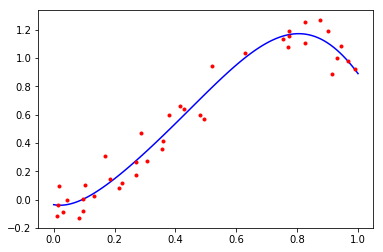

In [38]:
############ PLOTTING FITTED MODEL
# Plot the fitted model as in the second cell
# ...
x = np.linspace(0,1,100)
y = predict_y(x,betaOpt)

plt.plot(x,y,'b-',df.x,df.y,'r.')
plt.show()